## Convert paradigm epochs to current format

In [ ]:
import pandas as pd
import numpy as np

file = "/data/Clustering/SleepDeprivation/RatN/Day2/RatN_Day2_2019-10-11_03-58-54_epochs.npy"

data = np.load(file, allow_pickle=True).item()

epochs = pd.DataFrame(data)
a = epochs.T.reset_index()

epochs_new = pd.DataFrame(
    {"start": a[0], "stop": a[1], "label": a["index"].str.lower()}
)
metadata = None

data = {"epochs": epochs_new, "metadata": metadata}

# np.save(file[:-11] + ".paradigm.npy", data)


## Convert artifact to current format

In [ ]:
import pandas as pd
import numpy as np

file = "/data/Clustering/SleepDeprivation/RatS/Day3SD/RatS_Day3SD_2020-11-29_07-53-30.artifact.npy"

data = np.load(file, allow_pickle=True).item()

epochs = pd.DataFrame(
    {"start": data["time"][:, 0], "stop": data["time"][:, 1], "label": ""}
)
metadata = {"channels": data["channel"], "thresh": data["threshold"]}
data = {"epochs": epochs, "metadata": metadata}

# np.save(file, data)


In [1]:
import subjects

sess = subjects.sd.ratNday1[0]

In [4]:
sess.paradigm.as_array().shape

(4, 2)

In [ ]:
import subjects
from ModulesPath.core import Position, Track

sess = subjects.Sd.ratSday3[0]

pos = Position(
    time=sess.position.t,
    x=sess.position.x,
    y=sess.position.y,
    sampling_rate=int(sess.position.tracking_sRate),
)

int(pos.sampling_rate)

pos.linearize(period=sess.paradigm.maze1, sample_sec=3)
pos.linearize(period=sess.paradigm.maze2, sample_sec=3)


In [ ]:
import numpy as np
from probeinterface import Probe, ProbeGroup
from probeinterface.plotting import plot_probe_group, plot_probe

n = 24
positions = np.zeros((n, 2))
for i in range(n):
    x = i // 8
    y = i % 8
    positions[i] = x, y
positions *= 20
positions[8:16, 1] -= 10

probe_2d = Probe(ndim=2, si_units="um")
probe_2d.set_contacts(positions=positions, shapes="circle", shape_params={"radius": 5})
probe_2d.create_auto_shape(probe_type="tip")


In [ ]:
from neo.io import RawBinarySignalIO
import quantities as pq

file = (
    "/data/Clustering/SleepDeprivation/RatR/Day2SD/RatR_Day2SD_2021-05-23_09-07-18.eeg"
)
reader = RawBinarySignalIO(filename=file, sampling_rate=1250, nb_channel=128)


In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt
plt.plot(a)

In [ ]:
import numpy as np
from ModulesPath.io import NeuroscopeIO

In [ ]:
info = NeuroscopeIO(
    "/data/Clustering/SleepDeprivation/RatJ/Day1/RatJ_Day1_2019-05-31_03-55-36.xml"
)


In [ ]:
from pathlib import Path

folder = Path("/data/Clustering/SleepDeprivation/RatJ/Day1")
a = folder.glob("*.xml")
for file in folder.iterdir():
    if file.suffix == ".xml":
        print(file.name)


In [ ]:
import numpy as np

file = "/data/Clustering/SleepDeprivation/RatN_Day1_test_neuropy/RatN_Day1_2019-10-09_03-52-32.eeg"
data = np.memmap(file, dtype="int16", mode="r")
data = np.memmap.reshape(data, (len(data) // 134, 134)).T


In [ ]:
from spikeextractors import BinDatRecordingExtractor

a = BinDatRecordingExtractor(file, sampling_frequency=1250, numchan=134, dtype="int16")
a._epochs

In [ ]:
a.get_traces(channel_ids=[1, 4])


In [ ]:
from neuropy.core import animal

a = animal.Animal()

In [ ]:
import numpy as np
from pathlib import Path

file = Path("/data/Clustering/SleepDeprivation/RatN_Day1_test_neuropy/params.py")

params = {}
with file.open("r") as f:
    for line in f:
        line_values = (
            line.replace("\n", "").replace('r"', '"').replace('"', "").split("=")
        )
        params[line_values[0].strip()] = line_values[1].strip()


params

In [ ]:
import pandas as pd
from pathlib import Path

file = Path("/data/Clustering/SleepDeprivation/RatN_Day1_test_neuropy/cluster_info.tsv")
data = pd.read_csv(file, delimiter="\t")
a = data[data["group"].isin(["mua", "good"])].reset_index(drop=True)

b = np.arange(10)
for i in data.itertuples():
    np.where(b == i.id)


In [ ]:
from pathlib import Path
from neuropy.io import PhyIO
from neuropy.core import Neurons

phy_data = PhyIO(
    Path(
        "/home/bapung/Documents/ClusteringHub/spykcirc/RatR/Day2SD/Allsession/RatR_Day2SD_2021-05-23_09-07-18-1.GUI"
    )
)

neurons = Neurons(
    phy_data.spiketrains, t_stop=53000, t_start=0, sampling_rate=phy_data.sampling_rate
)


In [ ]:
import numpy as np
from neuropy.core import Position


x = np.random.randn(10)
y = np.random.randn(10)
z = np.random.randn(10)
t = np.arange(0,10)

pos = Position(t,x,y,z,sampling_rate=1)



In [ ]:
from neuropy import plotting

plotting.plot_position(pos)

In [ ]:
a = np.array([1,2]).reshape(1,-1)

In [ ]:
import numpy as np
b = np.array(['2001-01-01T12:00', '2002-02-03T13:56:03.172'], dtype='datetime64')

In [ ]:
import pandas as pd
from neuropy.core import Epoch

epoch = pd.DataFrame({'start':[1],'stop':[2],'label':['sdf']})

epoch = Epoch(epochs=epoch)

In [ ]:
import numpy as np

a = []
a.append([1,2,'hola'])
a.append([5,6,'hol'])
np.array(a,dtype='object')[:,0]


In [ ]:
import numpy as np
from neuropy.core import Neurons
from neuropy import plotting
spiketrains = np.array([np.sort(np.random.rand(_)) for _ in range(100,200)],dtype=object) 
neurons = Neurons(spiketrains,t_stop=1)

plotting.plot_raster(neurons,color = 'jet')

In [ ]:
import numpy as np
from neuropy.core import Mua

mua = Mua(spike_counts=np.array([1,2,3]),bin_size=0.2)

In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

file1 = '/data/Clustering/sessions/RatS/Day2NSD/RatS-Day2NSD-2020-11-27_10-22-29_position.npy'
file2 = '/data/Clustering/sessions/RatS/Day2NSD/RatS-Day2NSD-2020-11-27_10-22-29.position.npy'

data1 = np.load(file1,allow_pickle=True).item()
data2 = np.load(file2,allow_pickle=True).item()


plt.plot(data1['x'])
plt.plot(data2['traces'][1])

In [ ]:
import numpy as np

file = '/data/Clustering/sessions/RatN/Day2/2019-10-11_03-58-54/experiment1/recording1/continuous/Rhythm_FPGA-100.0/timestamps.npy'

data = np.load(file)

In [ ]:
import pandas as pd

duration = pd.Timedelta(30120/30000,unit='sec')

In [ ]:
fileName ='/data/Clustering/sessions/RatN/Day2/position/Take 2019-10-11 04.08.48 AM.fbx'

with open(fileName) as f:
    next(f)
    for i, line in enumerate(f):

        m = "".join(line)

        if "KeyCount" in m:
            print(m)
            # print("break at i = " + str(i))
            # line_frame = linecache.getline(fileName, i + 2).strip().split(" ")
            break



In [ ]:
import numpy as np

file = '/data/Clustering/sessions/RatU/RatUDay2NSD/RatU_Day2NSD_2021-07-24_08-16-38.paradigm.npy'

data = np.load(file,allow_pickle=True).item()
data['epochs']


In [ ]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

file_name = "RatU_Day4SD_2021-07-29_08-23-06.eeg_sample.eeg"
n_channels = 192 # number of recorded channels in the file
sampling_rate = 1250
# reading data from binary file and reshaping to n_channels x time format
data = np.memmap(file_name,dtype='int16',mode='r').reshape(-1,n_channels).T

#let's plot data from first channel
plt.plot(data[0])


In [ ]:
import subjects

sess = subjects.sd.ratUday4[0]
signal = sess.eegfile.get_signal([15],1000,2000)

In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt

plt.plot(signal.traces[0]*0.195)

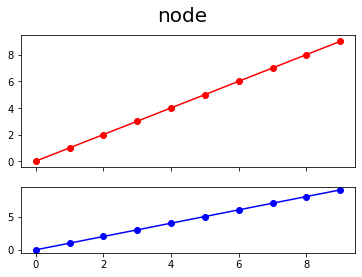

In [5]:
import matplotlib.pyplot as plt

tPlot, axes = plt.subplots(
        nrows=2, ncols=1, sharex=True, sharey=False, 
        gridspec_kw={'height_ratios':[2,1]}
        )

tPlot.suptitle('node', fontsize=20)

axes[0].plot(range(10),'ro-') 
axes[1].plot(range(10),'bo-') 
# axes[2].plot(range(10),'go-') 
# axes[3].plot(range(10),'mo-') 

In [6]:
import numpy as np
a = np.arange(10).reshape(5,2)

a[0] = [5,4]
a

array([[5, 4],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])